In [1]:
import cv2
import os
import shutil
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from sklearn.model_selection import train_test_split
from keras import layers, Input, models, optimizers
from keras.models import Model, Sequential
from keras.layers import MaxPooling2D, Conv2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras_preprocessing import image

C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\tensorflow\python\framework\dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\tensorflow\python\framework\dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\tensorflow\python\framework\dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ten

In [2]:
from keras.applications import VGG16

conv_base = VGG16(weights = 'imagenet',
                 include_top=False,
                 input_shape=(150,150,3))

In [3]:
base_dir = './data/train_lower_base'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [4]:
def extract_features(directory,sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count,5))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150,150),
        batch_size=batch_size,
        class_mode='categorical')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

In [5]:
train_sampel = 1250

train_features, train_labels = extract_features(train_dir, train_sampel) #5096

Found 1250 images belonging to 5 classes.


In [6]:
validation_sample = 625

validation_features, validation_labels = extract_features(validation_dir, validation_sample) # 2548

Found 625 images belonging to 5 classes.


In [7]:
test_sample = 625

test_features, test_labels = extract_features(test_dir, test_sample) #2547

Found 625 images belonging to 5 classes.


In [8]:
train_features = np.reshape(train_features,(train_sampel, 4 * 4 * 512))
validation_features = np.reshape(validation_features,(validation_sample, 4 * 4 * 512))
test_features = np.reshape(test_features,(test_sample, 4 * 4 * 512))

In [9]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
mc = ModelCheckpoint('best_model_pattern_0424.h5', monitor='val_loss', mode='min', save_best_only=True)

In [10]:
from keras import models, layers, optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim = 4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))
model.compile(optimizer = optimizers.RMSprop(lr=2e-5),
                         loss='categorical_crossentropy',
                         metrics=['acc'])

In [11]:
history = model.fit(train_features, train_labels,
                   epochs=500,
                   batch_size=20,
                   validation_data=(validation_features, validation_labels),
                   callbacks=[es,mc])

Train on 1250 samples, validate on 625 samples
Epoch 1/500
1250/1250 [==============================] - 2s 1ms/step - loss: 1.6412 - acc: 0.2984 - val_loss: 1.1647 - val_acc: 0.6000
Epoch 2/500
1250/1250 [==============================] - 2s 1ms/step - loss: 1.1751 - acc: 0.5352 - val_loss: 0.8990 - val_acc: 0.7456
Epoch 3/500
1250/1250 [==============================] - 2s 1ms/step - loss: 0.8987 - acc: 0.6688 - val_loss: 0.7689 - val_acc: 0.7920
Epoch 4/500
1250/1250 [==============================] - 2s 1ms/step - loss: 0.7378 - acc: 0.7456 - val_loss: 0.6400 - val_acc: 0.8304
Epoch 5/500
1250/1250 [==============================] - 2s 1ms/step - loss: 0.6428 - acc: 0.7816 - val_loss: 0.5710 - val_acc: 0.8480
Epoch 6/500
1250/1250 [==============================] - 2s 1ms/step - loss: 0.5598 - acc: 0.8272 - val_loss: 0.5246 - val_acc: 0.8592
Epoch 7/500
1250/1250 [==============================] - 2s 1ms/step - loss: 0.4868 - acc: 0.8264 - val_loss: 0.4885 - val_acc: 0.8720
Epoch 8/

1250/1250 [==============================] - 2s 1ms/step - loss: 0.0243 - acc: 0.9976 - val_loss: 0.2940 - val_acc: 0.9024
Epoch 61/500
1250/1250 [==============================] - 2s 1ms/step - loss: 0.0235 - acc: 0.9992 - val_loss: 0.2981 - val_acc: 0.9040
Epoch 62/500
1250/1250 [==============================] - 2s 1ms/step - loss: 0.0212 - acc: 0.9984 - val_loss: 0.2908 - val_acc: 0.9056
Epoch 63/500
1250/1250 [==============================] - 2s 1ms/step - loss: 0.0229 - acc: 0.9968 - val_loss: 0.3007 - val_acc: 0.8960
Epoch 64/500
1250/1250 [==============================] - 2s 1ms/step - loss: 0.0187 - acc: 0.9992 - val_loss: 0.3029 - val_acc: 0.9008
Epoch 65/500
1250/1250 [==============================] - 2s 1ms/step - loss: 0.0225 - acc: 0.9968 - val_loss: 0.2947 - val_acc: 0.9024
Epoch 66/500
1250/1250 [==============================] - 2s 1ms/step - loss: 0.0176 - acc: 1.0000 - val_loss: 0.2969 - val_acc: 0.9024
Epoch 67/500
1250/1250 [==============================] - 2s 

In [14]:
model.save('upper0425_9990.h5')

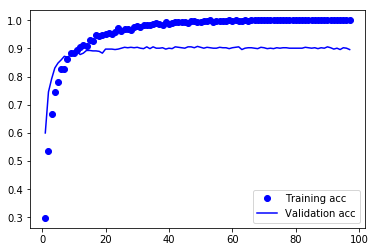

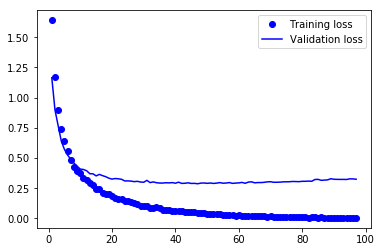

In [13]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
# plt.tilte('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
# plt.tilte('Training and validation loss')
plt.legend()

plt.show()